In [19]:
# setup

#import required/useful libraries
import nltk
import pandas as pd
import matplotlib
import numpy as np
import urllib.request

print('finished processing import statements')


#Read in data
prefix = "https://raw.githubusercontent.com/annajordanous/COMP6481-8481/main/"
suffix = ".pdf.txt"
samples = ["instb", "unitb", "instw", "unitw"]
b_env = ["TheUniversityofBirmingham", "TheUniversityofSheffield", "UniversityofNottingham,The", 
         "TheUniversityofLancaster", "UniversityofBristol", "UniversityofSouthampton", 
         "TheUniversityofManchester", "UniversityofDundee", "UniversityofYork"]
w_env = ["AstonUniversity", "BirkbeckCollege", "LiverpoolJohnMooresUniversity",
         "ManchesterMetropolitanUniversity", "NottinghamTrentUniversity", "TheUniversityofHuddersfield",
         "TheUniversityofWestLondon", "UniversityofEastLondon", "UniversityofStirling"]
k_env = ["TheUniversityofKent"]
instb = {}
instw = {}
instk = {}
unitb = {}
unitw = {}
unitk = {}

def readURL(filename):
    # open a connection to a URL using urllib
    webUrl  = urllib.request.urlopen(filename)
    # read the data from the URL and print it
    data = webUrl.read()
    return data
    
def readFiles(x, tag):
    itag = "inst"+tag
    filenameI = prefix+itag+"/"+itag+x+suffix
    utag = "unit"+tag
    filenameU = prefix+utag+"/"+utag+x+"-11"+suffix
    dataI = str(readURL(filenameI))
    dataU = str(readURL(filenameU))
    return(dataI, dataU)

print("finished setting up variables and functions for data readin")


# this cell may take some time to run

# read in textual data 
for x in b_env:
    (instb[x], unitb[x]) = readFiles(x, "b")
    
for x in w_env:
    (instw[x], unitw[x]) = readFiles(x, "w")

for x in k_env:
    (instk[x], unitk[x]) = readFiles(x, "k")
    
print("Finished reading in textual data")

finished processing import statements
finished setting up variables and functions for data readin
Finished reading in textual data


In [20]:
import re
# create the texts for sentiment analysis
# can swap the text for unit or instituion

def preprocess(text):
    sent_text = nltk.sent_tokenize(text)
    # get rid of \\n tokens (newlines) from pdf -> txt conversion
    sent_text = [x.replace('\\n','') for x in sent_text]
    # get rid of pdf unicode escape tokens from pdf -> text converstion
    pdf_escape_pattern = re.compile(r'\\\\x[a-fA-F0-9]{2}')
    sent_text = [pdf_escape_pattern.sub('', x.encode('unicode_escape').decode()) for x in sent_text]
    return sent_text


def createThreeTextsUnit():
    better_text = ""
    for x in b_env:
        better_text+=unitb[x]
    texts_sa_unit["BetterUniversities"] = preprocess(better_text)
    worse_text = ""
    for x in w_env:
        worse_text+=unitw[x]
    texts_sa_unit["WorseUniversities"] = preprocess(worse_text)
    for x in k_env:
        texts_sa_unit["TheUniversityofKent"] = preprocess(unitk[x])

def createThreeTextsInstituion():
    better_text = ""
    for x in b_env:
        better_text+=instb[x]
    texts_sa_inst["BetterUniversities"] = preprocess(better_text)
    worse_text = ""
    for x in w_env:
        worse_text+=instw[x]
    texts_sa_inst["WorseUniversities"] = preprocess(worse_text)
    for x in k_env:
        texts_sa_inst["TheUniversityofKent"] = preprocess(instk[x])

texts_sa_unit = {}
texts_sa_inst = {}

createThreeTextsUnit()
createThreeTextsInstituion()
print(texts_sa_unit["TheUniversityofKent"])
print(texts_sa_inst["TheUniversityofKent"])

['b"Unit-level environment template (REF5b) Institution: University of Kent Unit of Assessment: 11: Computer Science and Informatics 1.', 'Unit context and structure, research and impact strategy 1.1 Context and Structure UoA11 at Kent is the School of Computing.', 'We conduct research of the highest quality in our four priority areas, for each of which we have established a well-resourced research group.', 'These four groups are:         Programming Languages and Systems (PLAS).', 'Research in PLAS focuses on          foundational aspects of Computer Science by addressing the formalism, implementation,          and verification of programming languages, encompassing functional programming, type          systems, concurrent systems, and automated verification.', 'PLAS members are widely          recognised for the quality of their research, publishing solutions to longstanding problems          and holding programme committee memberships for conferences such as POPL, ICFP,          ICL

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def create_sentiments(text):
    sentiments = [analyzer.polarity_scores(report) for report in text]
    return sentiments
    
def get_avg_sentiment(sentiments):
    sentiments_avg = sum([sum(sentiment.values()) / len(sentiment) for sentiment in sentiments]) / len(sentiments)
    #print(sentiments)
    #print(sum([sentiment["neg"] for sentiment in sentiments]) / len(sentiments))
    #my_uni_avg_sentiment = sum([sum(sentiment.values()) / len(sentiment) for sentiment in my_uni_sentiments]) / len(my_uni_sentiments)
    return sentiments_avg

def createAvgSentiments(texts_sa_dict):
    sentiments_dict = {}
    # Calculate the sentiment scores for each report
    kent_sentiments = create_sentiments(texts_sa_dict["TheUniversityofKent"])
    better_uni_sentiments = create_sentiments(texts_sa_dict["BetterUniversities"])
    worse_uni_sentiments = create_sentiments(texts_sa_dict["WorseUniversities"])

    # Calculate the average sentiment score for each set of reports
    sentiments_dict["kent"] = get_avg_sentiment(kent_sentiments)
    sentiments_dict["better"] = get_avg_sentiment(better_uni_sentiments)
    sentiments_dict["worse"] = get_avg_sentiment(worse_uni_sentiments)

    return sentiments_dict

    # Print out the average sentiment scores
    #print("My university's average sentiment score:", my_uni_avg_sentiment)
    #print("Average sentiment score for better universities:", better_uni_avg_sentiment)
    #print("Average sentiment score for worse universities:", worse_uni_avg_sentiment)

# Load the VADER sentiment analyzer
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

sentiments_avg_unit = createAvgSentiments(texts_sa_unit)
sentiments_avg_inst = createAvgSentiments(texts_sa_inst)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.069, 'neu': 0.888, 'pos': 0.043, 'compound': -0.25}, {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.4767}, {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.5267}, {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.96, 'pos': 0.04, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.34}, {'neg': 0.109, 'neu': 0.614, 'pos': 0.276, 'compound': 0.7717}, {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.8834}, {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.5106}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9565}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},

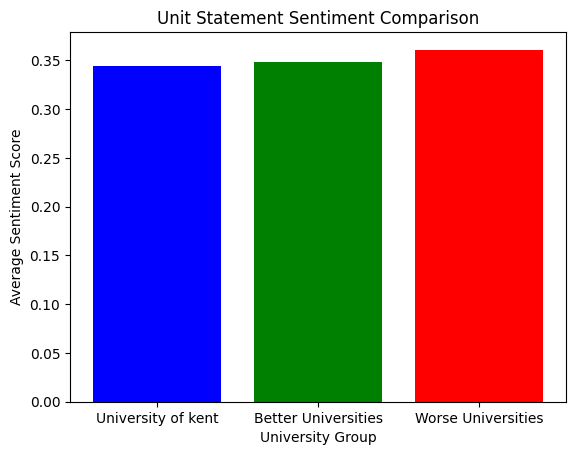

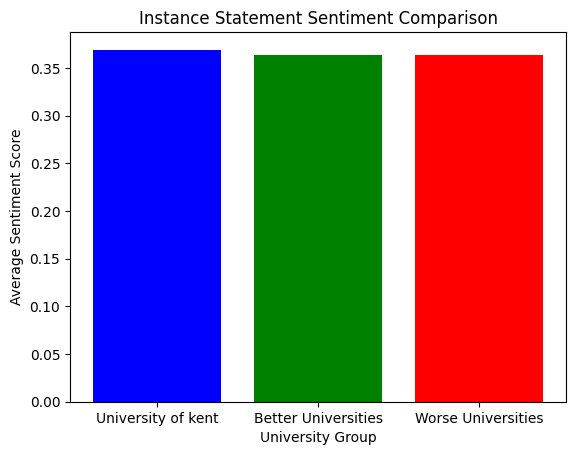

In [22]:
import matplotlib.pyplot as plt

def createGraph(data, statement_type):
    # Define the average sentiment scores for each group
    # Create a bar chart
    plt.bar(["University of kent", "Better Universities", "Worse Universities"], [data["kent"], data["better"], data["worse"]], color=["blue", "green", "red"])

    # Add labels and a title
    plt.xlabel("University Group")
    plt.ylabel("Average Sentiment Score")
    plt.title(f"{statement_type} Statement Sentiment Comparison")

    # Display the chart
    plt.show()
    
createGraph(sentiments_avg_unit, "Unit")
createGraph(sentiments_avg_inst, "Instance")

In [65]:
# for later use, create average sentiments for a passed text, but split it up into neg, neu, positive
# since this is used for individual universities return the dict rather than editing existing dicts
def createAvgSentimentsText(text):
    sentiments = create_sentiments(preprocess(text))
    data = {}
    data["neg_avg"] = round(sum([sentiment["neg"] for sentiment in sentiments]) / len(sentiments), 2)
    data["neu_avg"] = round(sum([sentiment["neu"] for sentiment in sentiments]) / len(sentiments), 2)
    data["pos_avg"] = round(sum([sentiment["pos"] for sentiment in sentiments]) / len(sentiments), 2)
    return data

def setup_uni(uni, text, graph_dict):
    data = createAvgSentimentsText(text)
    graph_dict["University"].append(uni)
    graph_dict["Positive"].append(data["pos_avg"])
    graph_dict["Negative"].append(data["neg_avg"])
    graph_dict["Neutral"].append(data["neu_avg"])

def gen_individual_sentiment_scores_unit(graph_dict):
    for x in b_env:
        setup_uni(x, unitb[x], graph_dict)
    for x in w_env:
        setup_uni(x, unitw[x], graph_dict)
    for x in k_env:
        setup_uni(x, unitk[x], graph_dict)

def gen_individual_sentiment_scores_inst(graph_dict):
    for x in b_env:
        setup_uni(x, instb[x], graph_dict)
    for x in w_env:
        setup_uni(x, instw[x], graph_dict)
    for x in k_env:
        setup_uni(x, instk[x], graph_dict)

individual_uni_sentiment_scores_unit = {
    "University": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

individual_uni_sentiment_scores_inst = {
    "University": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

gen_individual_sentiment_scores_unit(individual_uni_sentiment_scores_unit)
gen_individual_sentiment_scores_inst(individual_uni_sentiment_scores_inst)

individual_uni_sentiment_scores_inst

{'University': ['TheUniversityofBirmingham',
  'TheUniversityofSheffield',
  'UniversityofNottingham,The',
  'TheUniversityofLancaster',
  'UniversityofBristol',
  'UniversityofSouthampton',
  'TheUniversityofManchester',
  'UniversityofDundee',
  'UniversityofYork',
  'AstonUniversity',
  'BirkbeckCollege',
  'LiverpoolJohnMooresUniversity',
  'ManchesterMetropolitanUniversity',
  'NottinghamTrentUniversity',
  'TheUniversityofHuddersfield',
  'TheUniversityofWestLondon',
  'UniversityofEastLondon',
  'UniversityofStirling',
  'TheUniversityofKent'],
 'Positive': [0.14,
  0.14,
  0.14,
  0.14,
  0.12,
  0.11,
  0.12,
  0.14,
  0.13,
  0.14,
  0.11,
  0.12,
  0.13,
  0.14,
  0.13,
  0.13,
  0.12,
  0.16,
  0.13],
 'Negative': [0.01,
  0.01,
  0.0,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.0,
  0.02,
  0.01,
  0.01,
  0.0,
  0.01,
  0.0,
  0.01,
  0.01,
  0.01,
  0.01],
 'Neutral': [0.86,
  0.84,
  0.86,
  0.85,
  0.87,
  0.88,
  0.87,
  0.85,
  0.87,
  0.84,
  0.88,
  0.88,
  0.86,
 

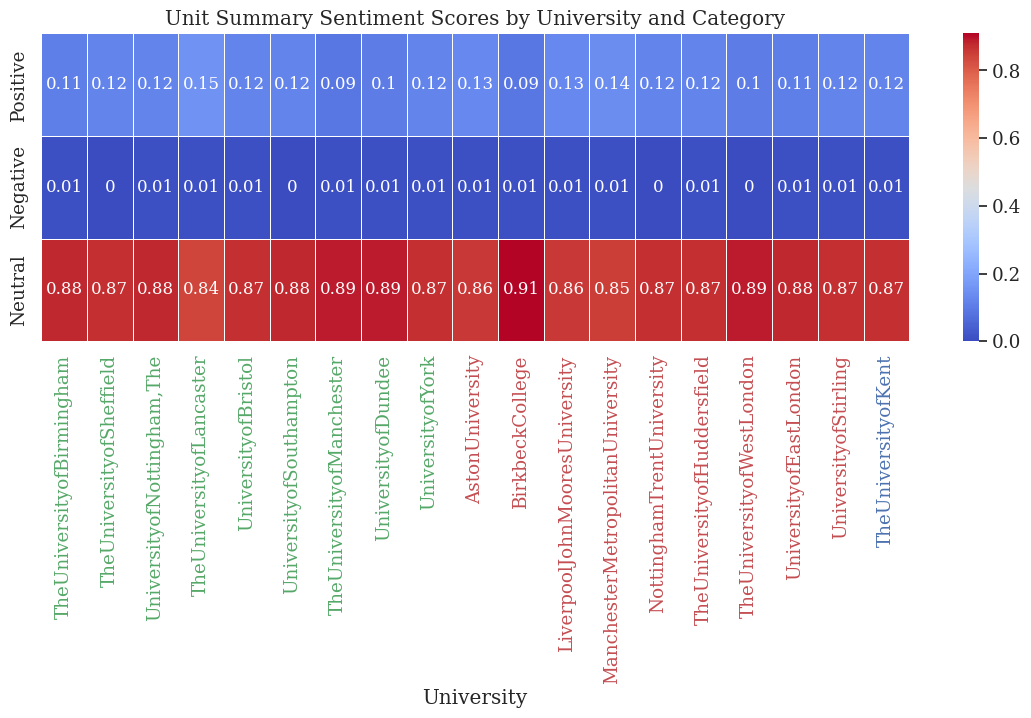

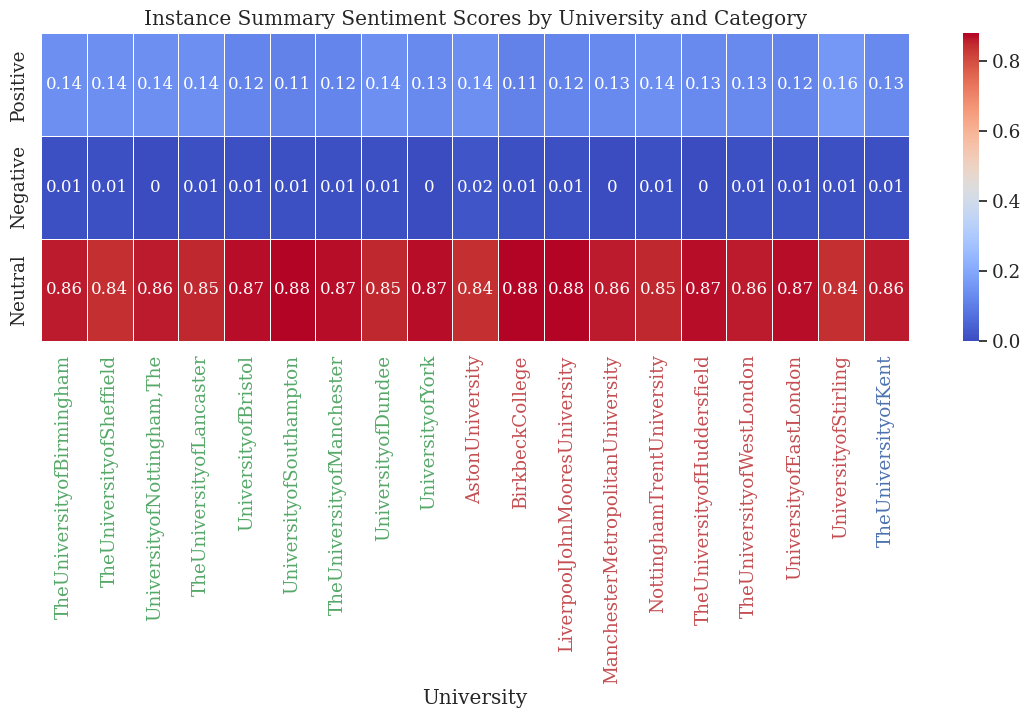

In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def createHeatmap(data, summary_type):
    df = pd.DataFrame(data)

    # create a heatmap using seaborn
    sns.set(font_scale=1.2)
    sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})
    fig, ax = plt.subplots(figsize=(14, 4))
    heatmap = sns.heatmap(df.set_index('University').transpose(), annot=True, cmap='coolwarm', linewidths=.5, ax=ax, annot_kws={"size": 12})

    for i, label in enumerate(ax.get_xticklabels()):
        if b_env.count(label.get_text()) == 1:
            label.set_color("g")
        elif w_env.count(label.get_text()) == 1:
            label.set_color("r")
        elif k_env.count(label.get_text()) == 1:
            label.set_color("b")

    plt.title(f"{summary_type} Summary Sentiment Scores by University and Category")
    plt.show()
    
createHeatmap(individual_uni_sentiment_scores_unit, "Unit")
createHeatmap(individual_uni_sentiment_scores_inst, "Instance")